## Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#plt.rcParams["figure.figsize"]=[6,4]
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project_data/NCKU_DSAI/HW1/export.csv',encoding='utf-8')
df

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW),備轉容量率(%),工業用電(百萬度),民生用電(百萬度),核一#1(萬瓩),核一#2(萬瓩),核二#1(萬瓩),核二#2(萬瓩),核三#1,核三#2,林口#1,林口#2,林口#3,台中#1,台中#2,台中#3,台中#4,台中#5,台中#6,台中#7,台中#8,台中#9,台中#10,興達#1,興達#2,興達#3,興達#4,大林#1,大林#2,和平#1,和平#2,麥寮#1,麥寮#2,麥寮#3,汽電共生,大潭 (#1-#6),通霄 (#1-#6),興達 (#1-#5),南部 (#1-#4),大林(#5-#6),海湖 (#1-#2),國光 #1,新桃#1,星彰#1,星元#1,嘉惠#1,豐德(#1-#2),協和 (#1-#4),氣渦輪,離島,德基,青山,谷關,天輪,馬鞍,萬大,大觀,鉅工,大觀二,明潭,碧海,立霧,龍澗,卓蘭,水里,其他小水力,風力發電,太陽能發電
0,20190101,26429,23872,2557.0,10.71,279.870,192.192,0,0,98.4,98.3,94.3,0.0,76.0,76.1,NaN,52.5,0.0,0.0,52.1,52.5,52.2,51.9,0.0,47.3,0.0,28.1,28.1,38.4,52.5,75.6,76.4,56.3,56.5,56.8,0.0,52.3,39.7,217.2,128.8,79.9,104.9,74.9,45.9,0.0,0.0,53.7,56.9,0.0,105.0,13.3,0.0,10.9,0.0,2.7,2.5,2.2,1.2,0.9,0.0,0.1,16.0,54.0,0.0,1.2,3.0,2.2,0.0,24.3,50.9,0.0
1,20190102,30047,28148,1899.0,6.75,323.080,221.864,0,0,98.5,98.6,94.3,0.0,76.0,76.0,NaN,53.3,0.0,0.0,52.1,52.7,52.3,51.9,0.0,0.0,0.0,33.1,33.0,42.2,52.6,75.6,76.4,60.0,60.3,56.8,0.0,57.1,104.4,243.0,135.8,151.1,101.9,91.7,92.0,49.5,60.1,53.3,56.5,66.5,102.4,41.1,0.0,11.0,3.4,3.2,2.5,2.2,1.2,1.0,0.0,0.0,29.9,52.3,0.0,1.2,2.0,2.1,0.0,23.4,37.9,0.0
2,20190103,30343,28452,1891.0,6.65,336.597,231.146,0,0,98.7,98.6,94.1,0.0,75.9,75.9,NaN,53.3,0.0,0.0,52.0,52.7,52.2,51.9,0.0,0.0,0.0,28.2,28.1,37.8,52.6,75.8,76.4,59.9,49.3,56.8,0.0,57.1,104.0,261.6,129.0,147.5,93.8,91.6,92.0,49.2,60.2,53.4,56.3,66.5,104.0,86.9,0.0,10.9,3.1,1.4,2.5,2.2,1.1,2.4,1.9,0.5,14.3,65.5,0.0,1.4,1.2,2.0,0.1,24.1,41.6,0.0
3,20190104,30301,28490,1811.0,6.36,339.020,232.810,0,0,98.7,98.4,94.1,0.0,76.0,76.0,NaN,53.2,0.0,0.0,52.3,52.8,52.2,51.9,0.0,0.0,0.0,32.7,33.1,38.4,52.6,75.6,76.4,60.2,0.0,56.8,0.0,57.1,106.9,315.1,147.8,160.6,87.6,91.6,92.0,49.0,60.2,53.6,56.6,66.6,103.1,75.2,0.0,11.4,3.9,3.7,2.5,2.2,1.2,1.0,3.4,1.0,18.1,52.3,0.0,1.4,1.4,0.0,0.0,19.3,12.4,11.0
4,20190105,27957,26054,1903.0,7.30,315.825,216.882,0,0,98.7,98.6,94.1,0.0,75.7,75.8,NaN,53.1,0.0,0.0,52.2,52.9,52.2,51.8,28.1,0.0,0.0,28.2,28.1,32.8,52.7,75.8,76.5,57.5,0.0,56.8,0.0,57.1,40.6,264.4,146.4,161.3,106.2,88.7,46.1,0.0,60.1,53.2,55.8,68.6,102.3,13.1,0.0,11.3,0.3,1.2,2.2,1.8,0.8,0.9,1.8,0.7,30.4,57.6,0.0,1.3,3.0,2.9,0.0,23.9,18.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,20201027,35071,31669,3402.0,10.74,362.462,309.405,0,0,98.1,89.9,94.4,94.2,75.8,76.0,75.9,40.0,0.0,0.0,39.9,38.0,43.9,0.0,0.0,40.5,41.0,0.0,23.0,0.0,28.5,76.0,76.1,60.4,60.3,41.0,40.9,57.4,71.6,375.1,277.9,165.6,113.4,98.4,91.8,47.3,62.9,50.4,51.6,68.9,97.6,13.5,0.0,11.4,2.5,5.3,3.8,3.7,0.0,1.0,1.0,0.1,43.5,63.8,4.8,1.4,1.9,1.7,0.8,13.9,34.6,41.5
666,20201028,35429,31959,3470.0,10.86,365.469,311.972,0,0,98.0,98.2,94.6,94.3,75.9,76.0,76.0,37.6,0.0,0.0,33.0,34.1,33.1,0.0,0.0,43.6,33.3,0.0,22.2,0.0,25.8,75.9,76.1,60.2,60.3,37.5,37.4,57.4,70.1,383.7,275.8,150.7,101.5,72.3,92.0,46.9,64.9,50.4,51.5,68.9,96.2,39.1,0.0,12.1,0.0,2.7,3.9,3.8,0.0,0.9,1.9,0.8,14.4,48.0,4.0,1.2,1.4,0.0,0.5,13.7,58.8,161.6
667,20201029,34978,31271,3707.0,11.86,362.440,309.387,0,0,97.8,98.0,94.6,94.3,76.0,76.1,76.2,37.5,0.0,0.0,32.8,34.0,33.0,0.0,0.0,43.4,33.4,0.0,23.1,0.0,25.7,75.7,76.2,60.3,60.2,37.8,37.4,57.3,79.3,352.6,278.4,163.6,103.3,43.2,92.0,47.9,60.0,50.5,51.4,66.4,96.7,13.5,0.0,12.3,3.3,6.4,4.3,4.1,0.0,0.9,0.8,0.2,20.5,50.0,1.0,1.2,1.3,0.0,0.5,16.2,60.8,143.3
668,20201030,34479,30264,4215.0,13.93,351.492,300.041,0,0,97.8,98.0,94.5,94.3,76.0,76.2,76.1,37.6,0.0,0.0,32.9,34.1,33.0,0.0,0.0,32.7,33.5,0.0,23.2,0.0,25.8,76.0,76.2,60.2,60.2,56.8,56.7,57.4,76.3,305.4,282.1,159.1,104.3,35.7,39.4,39.1,59.9,45.0,45.4,66.3,44.5,13.4,0.0,12.3,3.8,7.6,4.3,4.1,0.0,0.9,1.3,0.2,12.1,32.3,2.0,1.2,1.5,0.0,0.5,16.5,60.1,207.5


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Project_data/NCKU_DSAI/HW1/export2.csv',encoding='utf-8')
df2

,日期,備轉容量(萬瓩),備轉容量率(%)
0,2020/01/01,279.0,11.01
1,2020/01/02,308.0,10.91
2,2020/01/03,338.3,11.96
3,2020/01/04,363.6,14.21
4,2020/01/05,269.5,10.88
...,...,...,...
345,2020/12/11,312.9,10.46
346,2020/12/12,328.2,12.31
347,2020/12/13,283.0,11.12
348,2020/12/14,302.1,10.20


In [ ]:
df = df[['日期', '備轉容量(MW)']]
df2 = df2[['日期','備轉容量(萬瓩)']]

In [ ]:
date_list=[]
or_list=[]
for idx in range(len(df2)):
    date, or_ = df2.iloc[idx]
    or_ = or_*10
    date = date.split('/')
    date = ''.join(date)
    date = pd.to_datetime(date, format='%Y%m%d')
    date_list.append(date)
    or_list.append(or_)
df3 = pd.DataFrame({'日期':date_list, "備轉容量(MW)":or_list})
df3=df3.set_index('日期')
df3

,備轉容量(MW)
日期,
2020-01-01,2790.0
2020-01-02,3080.0
2020-01-03,3383.0
2020-01-04,3636.0
2020-01-05,2695.0
...,...
2020-12-11,3129.0
2020-12-12,3282.0
2020-12-13,2830.0


In [ ]:
date_list=[]
or_list=[]
for idx in range(len(df)):
    date, or_ = df.iloc[idx]
    date = pd.to_datetime(date, format='%Y%m%d')
    date_list.append(date)
    or_list.append(or_)
df4 = pd.DataFrame({'日期':date_list, "備轉容量(MW)":or_list})
df4=df4.set_index('日期')
df4

,備轉容量(MW)
日期,
2019-01-01,2557.0
2019-01-02,1899.0
2019-01-03,1891.0
2019-01-04,1811.0
2019-01-05,1903.0
...,...
2020-10-27,3402.0
2020-10-28,3470.0
2020-10-29,3707.0


In [ ]:
df5 = pd.concat([df3, df4]).sort_values('日期')
df5

,備轉容量(MW)
日期,
2019-01-01,2557.0
2019-01-02,1899.0
2019-01-03,1891.0
2019-01-04,1811.0
2019-01-05,1903.0
...,...
2020-12-11,3129.0
2020-12-12,3282.0
2020-12-13,2830.0


In [ ]:
df5 = df5[~df5.index.duplicated(keep='first')]
df5

,備轉容量(MW)
日期,
2019-01-01,2557.0
2019-01-02,1899.0
2019-01-03,1891.0
2019-01-04,1811.0
2019-01-05,1903.0
...,...
2020-12-11,3129.0
2020-12-12,3282.0
2020-12-13,2830.0


In [ ]:
# check if nan exist
df5.isna().sum()

備轉容量(MW)    0
dtype: int64

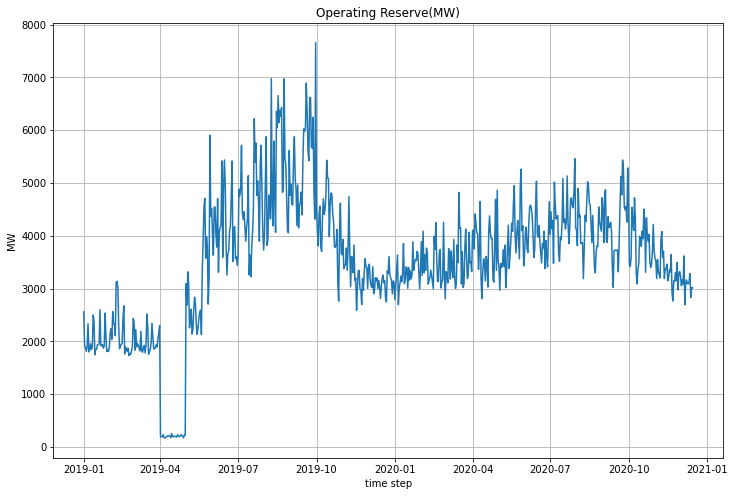

In [ ]:
plt.title('Operating Reserve(MW)')
plt.plot(df5['備轉容量(MW)'])
plt.xlabel('time step')
plt.ylabel('MW')
plt.grid()
plt.show()

In [ ]:
data = df5.values
data[:10]

array([[2557.],
       [1899.],
       [1891.],
       [1811.],
       [1903.],
       [2333.],
       [1800.],
       [1843.],
       [1954.],
       [1847.]])

## data split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.1, random_state=0, shuffle=False)
print('training samples:',len(X_train))
print('validation samples:',len(X_test))

training samples: 643
validation samples: 72


### normaliation features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
y_scaled = scaler.fit_transform(y_train)
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)

In [ ]:
# split a multivariate sequence into samples
def split_sequences(df_x, df_y, n_steps):
    X, y = list(), list()
    for i in range(len(df_x)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(df_x)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = df_x[i:end_ix,:], df_y[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

train_window = 12 #<---------------------

X_train_split, y_train_split = split_sequences(X_scaled, y_scaled, train_window)
X_test_split, y_test_split = split_sequences(X_test_scaled, y_test_scaled, train_window)
print('split x_train:',len(X_train_split))
print('split x_test:',len(X_test_split))

split x_train: 631
split x_test: 60


In [ ]:
X_train_split.shape

(631, 12, 1)

In [ ]:
X_train_split[0]

array([[0.31897392],
       [0.2311082 ],
       [0.23003993],
       [0.21935716],
       [0.23164234],
       [0.28906219],
       [0.21788829],
       [0.22363027],
       [0.2384526 ],
       [0.22416441],
       [0.22910519],
       [0.31096185]])

## pytorch

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
torch.manual_seed(0)

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU is avalible')
  print('Working on ',torch.cuda.get_device_name())
else:
  device = torch.device('cpu')
  print('GPU is not avalible')

GPU is avalible
Working on  Tesla K80


In [ ]:
class Data(Dataset):
    # Constructor
    def __init__(self, X, y):
        self.x = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).float()
        self.len = len(X)
            
    # Getter
    def __getitem__(self, index):
        return self.x[index].T, self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
        
train_data = Data(X_train_split, y_train_split)
valid_data = Data(X_test_split, y_test_split)

In [ ]:
class CNN(nn.Module):
    def __init__(self ,seq_length, in_channels, kernel_size):
        super(CNN, self).__init__()

        self.seq_length = seq_length
        self.in_channels = in_channels
        self.kernel_size = kernel_size

        self.feature = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Conv1d(in_channels=self.in_channels, out_channels=8, kernel_size=3, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Conv1d(in_channels=16, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(p=0.1),
        )

        self.tf_layer = nn.TransformerEncoderLayer(d_model=self.seq_length, nhead=4)

        self.flatten = nn.Flatten()

        self.fc = nn.Sequential(
            nn.Linear(seq_length*16, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        x = self.feature(x)
        #print('1:',x.shape)
        x = self.tf_layer(x)
        #print('2:',x.shape)
        x = self.flatten(x)
        #print('3:',x.shape)
        x = self.fc(x)
        return x

In [ ]:
def train(model, train_loader, valid_loader, optimizer, criterion, epochs=20):
    train_cost = []
    valid_cost = []
    for epoch in tqdm(range(epochs)):
        model.train() # Switch to train mode
        training_loss=[]
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            training_loss.append(loss.data.item())  
        train_cost.append(np.mean(training_loss))

        model.eval() # Switch to train mode
        training_loss=[]
        with torch.no_grad():
            for x, y in valid_loader:
                x, y = x.to(device), y.to(device) 
                z = model(x)
                loss = criterion(z, y)
                training_loss.append(loss.data.item())
            valid_cost.append(np.mean(training_loss))
            scheduler.step(np.mean(training_loss))

    return train_cost,valid_cost

In [ ]:
batch_size = 32
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_data, batch_size=batch_size, shuffle=False)

model = CNN(seq_length=train_window, in_channels=1, kernel_size=3)
model.to(device)

#criterion = torch.nn.MSELoss()
criterion = torch.nn.L1Loss() 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5)

In [ ]:
from torchsummary import summary
summary(model.to(device), (1,12))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Dropout-1                [-1, 1, 12]               0
            Conv1d-2                [-1, 8, 12]              32
       BatchNorm1d-3                [-1, 8, 12]              16
              ReLU-4                [-1, 8, 12]               0
           Dropout-5                [-1, 8, 12]               0
            Conv1d-6               [-1, 16, 12]             400
       BatchNorm1d-7               [-1, 16, 12]              32
              ReLU-8               [-1, 16, 12]               0
           Dropout-9               [-1, 16, 12]               0
           Conv1d-10               [-1, 16, 12]             784
      BatchNorm1d-11               [-1, 16, 12]              32
             ReLU-12               [-1, 16, 12]               0
          Dropout-13               [-1, 16, 12]               0
MultiheadAttention-14  [[-1, 16, 12], [

In [ ]:
# test
for x, y in train_loader:
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    z = model(x)
    print('='*10)
    print('x',x.shape)
    print('y',y.shape)
    print('z',z.shape)
    break

x torch.Size([32, 1, 12])
y torch.Size([32, 1])
z torch.Size([32, 1])


In [ ]:
train_cost = train(model=model,train_loader=train_loader,valid_loader=valid_loader,optimizer=optimizer,criterion=criterion,epochs=400)

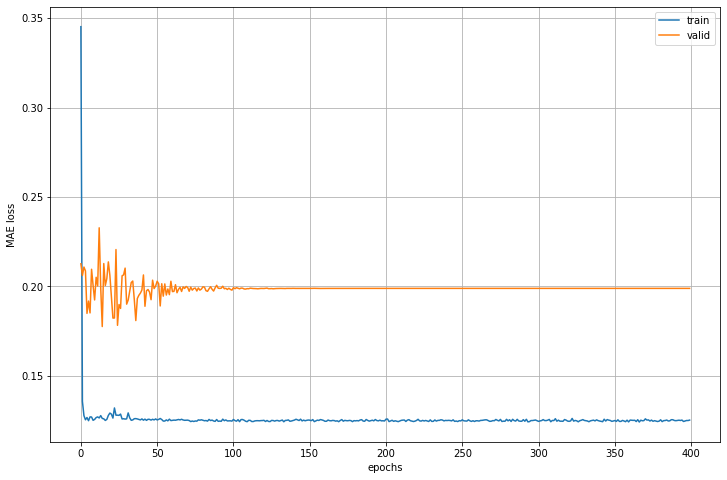

In [ ]:
plt.plot(train_cost[0], label = 'train')
plt.plot(train_cost[1], label = 'valid')
plt.ylabel('MAE loss')
plt.xlabel('epochs')
#axes = plt.gca()
#axes.set_ylim([0,1])
plt.legend()
plt.grid()
plt.show()

## eval

In [ ]:
fut_pred = train_window

test_inputs = X_train_split[-1].squeeze().tolist()
if type(test_inputs) == float:
    test_inputs = [test_inputs]

In [ ]:
model.eval()
loss_list = []

for i in range(len(X_test)):
    seq = torch.FloatTensor(test_inputs[-fut_pred:])
    #print(seq.shape)
    seq = seq.unsqueeze(0)
    #print(seq.shape)
    seq = seq.unsqueeze(0)
    #print(seq.shape)
    seq = seq.to(device)
    #print(seq.shape)
    #print('='*10)

    with torch.no_grad():
        test_inputs.append(model(seq).squeeze().tolist())
        loss_list.append(criterion(model(seq).squeeze().cpu().detach(), torch.from_numpy(y_test_scaled[i]).squeeze()))

In [ ]:
print('sum loss:',np.sum(loss_list))
print('mean loss:',np.mean(loss_list))

sum loss: 14.663292
mean loss: 0.20365684


In [ ]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:]).reshape(-1, 1))
#actual_predictions = np.array(test_inputs[train_window:]).reshape(-1, 1)
x = np.arange(len(data)-len(X_test), len(data), 1)

In [ ]:
criterion(torch.from_numpy(actual_predictions), torch.from_numpy(y_test))

tensor(412.8124, dtype=torch.float64)

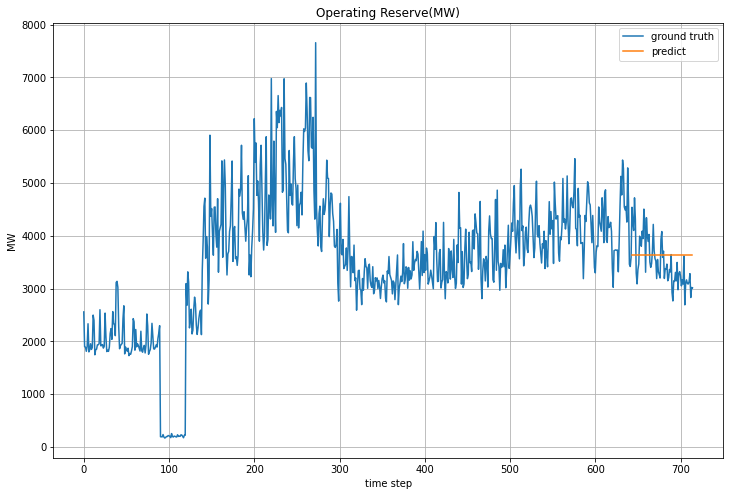

In [ ]:
plt.grid(True)
plt.title('Operating Reserve(MW)')
plt.plot(data, label='ground truth')
plt.plot(x,actual_predictions, label='predict')
plt.xlabel('time step')
plt.ylabel('MW')
plt.legend()
plt.show()

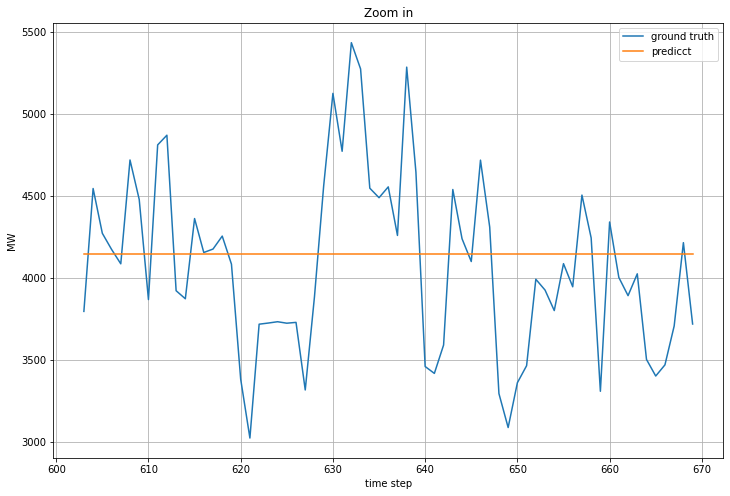

In [ ]:
plt.grid(True)
plt.title('Zoom in')
plt.plot(data[-len(X_test):], label='ground truth')
plt.plot(x,actual_predictions, label='predicct')
plt.xlabel('time step')
plt.ylabel('MW')
plt.legend()
plt.show()

## predict

In [ ]:
model.eval()
pred_train=[]
with torch.no_grad():
    for x, y in train_loader:
        x,y = x.to(device), y.to(device)
        pred_all = model(x)
        #print(pred_all)
        pred_train.extend(pred_all.squeeze().cpu())

model.eval()
pred_test=[]
with torch.no_grad():
    for x, y in valid_loader:
        x,y = x.to(device), y.to(device)
        pred_all = model(x)
        #print(pred_all)
        pred_test.extend(pred_all.squeeze().cpu())

In [ ]:
x = np.arange(len(data)-len(X_train_split)-len(X_test_split), len(data)-len(X_test_split), 1)
x2 = np.arange(len(data)-len(X_test_split), len(data), 1)

In [ ]:
len(x2)

60

In [ ]:
len(x)

631

In [ ]:
actual_predictions_1 = scaler.inverse_transform(np.array(pred_train).reshape(-1, 1))
actual_predictions_2 = scaler.inverse_transform(np.array(pred_test).reshape(-1, 1))

In [ ]:
len(actual_predictions_1)

631

In [ ]:
len(actual_predictions_2)

60

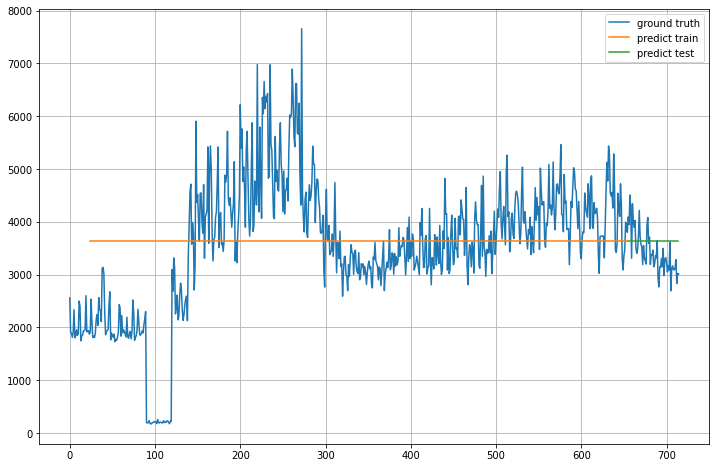

In [ ]:
plt.plot(data, label='ground truth')
plt.plot(x,actual_predictions_1, label='predict train')
plt.plot(x2,actual_predictions_2, label='predict test')
plt.legend()
plt.grid()
plt.show()